In [12]:
# import data
import pandas as pd
import numpy as np

# machine learining
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# plot data
import plotly.express as px


AMPLITUDE_THRESHOLD = 0.9


df = pd.read_csv("/home/alpha/programs/python_files/datasets/cnv_and_mut/entities.csv")

# some samples have more columns, filter them out and drop all samples from 450k. Usually theier ID begins with 9 or 3
df = df.dropna(axis=1)


# Make it amplitude agnostic (experimental) 
# comment out the lines with AMPLITUDE_THRESHOLD
v = df[["entity","Unnamed: 0"]]
df = df.drop(columns=["entity","Unnamed: 0"])
df = 2*((df-df.min())/(df.max()-df.min()))-1
df["ID"] = v["Unnamed: 0"]
df["entity"] = v["entity"]


# drop xy chromosomes and make features
df = df[df.columns.drop(list(df.filter(regex='[YX]')))]
features = df.columns.tolist()
features.remove("entity")
features.remove("ID")

# make targets and scale the data
x = df.loc[:,features].values
y_entity = df.loc[:,"entity"].values
y_id = df.loc[:,"ID"].values

print(x)

[[ 0.25852273  0.17549669  0.40976645 ...  0.37294564 -0.03333333
   0.11803279]
 [ 0.02556818  0.0794702  -0.12526539 ...  0.36283186  0.35208333
   0.29836066]
 [-0.21875     0.3013245   0.30360934 ...  0.28445006  0.12083333
   0.14098361]
 ...
 [-0.03693182  0.10927152  0.41825902 ...  0.52212389  0.35625
   0.44590164]
 [ 0.25568182  0.18211921  0.32059448 ...  0.45638432  0.44166667
   0.4557377 ]
 [ 0.08806818  0.07615894  0.49469214 ...  0.48672566  0.24166667
   0.36065574]]


In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)
print(scaled_features)

[[ 1.30887283 -0.14413791  0.501768   ...  0.36479315 -0.44311494
  -0.02596936]
 [ 0.5071754  -0.47065853 -1.16811243 ...  0.33479129  0.773594
   0.48564076]
 [-0.33362922  0.28371671  0.17044252 ...  0.10227685  0.04356864
   0.03914466]
 ...
 [ 0.29208585 -0.36932455  0.52827404 ...  0.80732064  0.78674761
   0.90423087]
 [ 1.29909603 -0.12161924  0.2234546  ...  0.61230853  1.05639662
   0.93213687]
 [ 0.72226495 -0.48191786  0.76682839 ...  0.70231412  0.42502333
   0.66237881]]


In [14]:
In [7]: kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [17]:
print(kmeans.inertia_,kmeans.cluster_centers_,kmeans.n_iter_)

8323190.383443095 [[ 0.11649943  0.28378686  0.41822443 ...  0.12568951  0.14738381
   0.12665882]
 [-0.22084687  0.3434984   0.35038381 ...  0.12281384  0.13172914
   0.20730049]
 [-0.00243009 -1.22977944 -1.5959878  ... -0.50395916 -0.57389008
  -0.62383441]] 23


In [21]:
In [13]: kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,}

sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

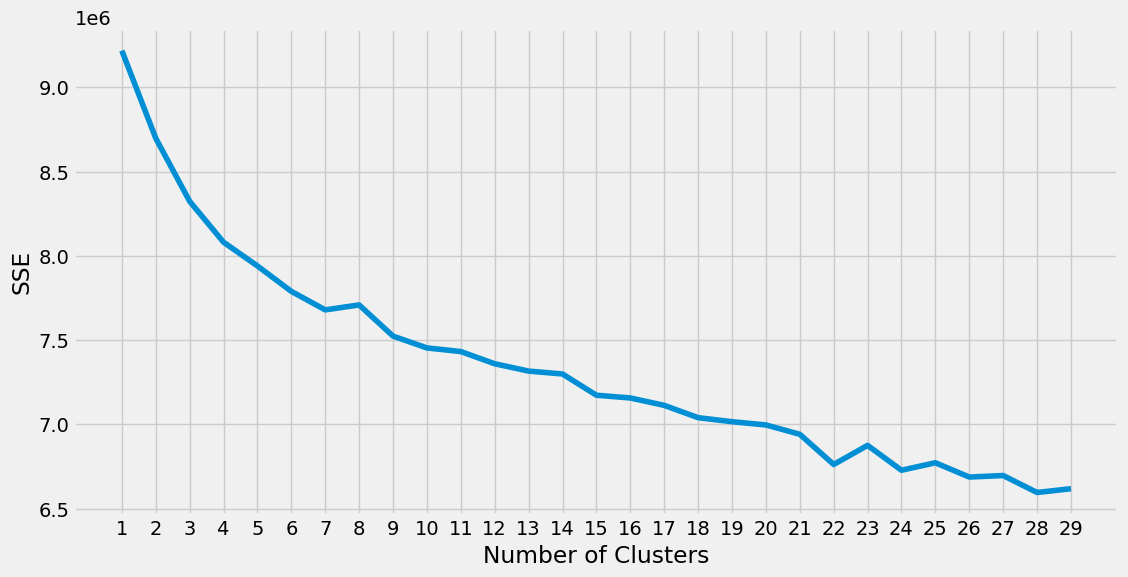

In [27]:
import matplotlib.pyplot as plt

plt.figure(dpi=100,figsize=[12,6])
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
In [15]: kl = KneeLocator(range(1, 30), sse, curve="convex", direction="decreasing")
kl.elbow

7

In [29]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

/home/alpha/miniconda3/envs/science/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/alpha/miniconda3/envs/science/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/alpha/miniconda3/envs/science/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/alpha/miniconda3/envs/science/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/alpha/miniconda3/envs/science/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/alpha/miniconda3/envs/science/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/alpha/miniconda3/envs/scienc

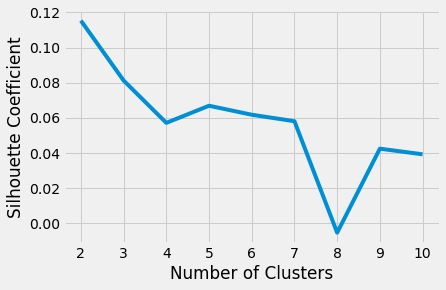

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()